# Inferential statistics
## Part III - Inferential Analysis

We're now going to look for answers to the ongoing basketball discussions between you and your family. The main ones we want to reasearch are the following:

- Your grandmother says that your sister couldn't play in a professional basketball league (not only the WNBA, but ANY professional basketball league) because she's too skinny and lacks muscle.
- Your sister says that most female professional players fail their free throws.
- Your brother-in-law heard on the TV that the average assists among NBA (male) and WNBA (female) players is 52 for the 2016-2017 season. He is convinced this average would be higher if we only considered the players from the WNBA.

Let's investigate these claims and see if we can find proof to refute or support them.

### Libraries
Import the necessary libraries first.

In [1]:
# Libraries
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp
pd.set_option('max_columns', 50)
from scipy.stats import norm

### Load the dataset

Load the cleaned dataset.

In [2]:
wnba = pd.read_csv("../data/wnba-clean.csv")
wnba.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71,21.200991,US,"January 17, 1994",23,Michigan State,2,8,173,30,85,35.3,12,32,37.5,21,26,80.8,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73,21.329438,US,"May 14, 1982",35,Duke,12,30,947,90,177,50.8,5,18,27.8,32,41,78.0,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69,23.875433,US,"October 27, 1990",26,Penn State,4,26,617,82,218,37.6,19,64,29.7,35,42,83.3,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84,24.543462,US,"December 11, 1988",28,Georgia Tech,6,31,721,75,195,38.5,21,68,30.9,17,21,81.0,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78,25.469388,US,"August 5, 1994",23,Baylor,R,24,137,16,50,32.0,7,20,35.0,11,12,91.7,3,9,12,12,7,0,14,50,0,0


# Question 1: Can my sister play in a professional female basketball league?

As we said, you grandmother is convinced that your sister couldn't play in a professional league because of her physique and weight (her weight is 67kg). 

To find an actual answer to the question we first need to know what's the average weight of a professional female basketball player. The data we have only refers to the WNBA league and not to every female professional basketball league in the world, therefore we have no way of actually calculating it.

Still, given that we do have *some* data we can **infer** it using a sample of players like the one we have. 

**How would you do it? Try and think about the requirements that your sample must satisfy in order to be used to infer the average weight. Do you feel it actually fulfills those requirements? Do you need to make any assumptions? We could calculate a confidence interval to do the inference, but do you know any other ways?**

In [3]:
"""
Sample size > 30
Normally distributed
Independent samples

"""

'\nSample size > 30\nNormally distributed\nIndependent samples\n\n'

**Now that all the requirements have been taken into account, compute the confidence interval of the average weight with a confidence level of 95%.**

In [4]:
avg_weight = np.mean(wnba["Weight"])
confidence = 0.95
df = len(wnba["Weight"])-1
stdv_weight = np.std(wnba["Weight"])
# stdv_weight = (wnba["Weight"]).std()

# tstudent_std = np.std(wnba["Weight"]) / math.sqrt(len(wnba["Weight"]))

stats.norm.interval(confidence, loc=avg_weight, scale=stdv_weight)

(57.50291420081216, 100.45483227806109)

**What can you say about these results?**

In [5]:
"""
There is a 95% likelihood of a random player having weight between 57kg to 100kg
"""

'\nThere is a 95% likelihood of a random player having weight between 57kg to 100kg\n'

**If your sister weighs 67kg what would you tell your grandmother in regards to her assumption?**

In [6]:
"""
Her weight wouldn'
"""

"\nHer weight wouldn'\n"

In [7]:
print(np.min(wnba["Weight"]))
print(np.max(wnba["Weight"]))

55
113


## Bonus: Can you plot the probability distribution of the average weight, indicating where the critical region is?

[]

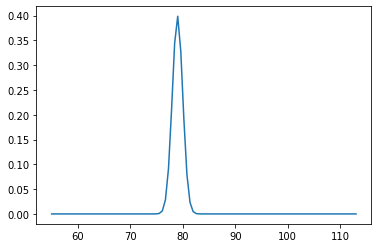

In [8]:
x_min = np.min(wnba["Weight"])
x_max = np.max(wnba["Weight"])

x = np.linspace(x_min, x_max, 100)
y = stats.norm.pdf(x,avg_weight)

plt.plot(x,y)
plt.plot()

# Question 2: Do female professional basketball players fail the majority of their free throws?

You do not agree with your sister when she says that most female players fail their free throws. You decide to try and estimate the percentage of players that fail more than 40% of their free throws using, you guessed it, the WNBA sample.

**How would you do it? Try and think about the requirements that your sample must satisfy in order to be used to infer the proportion of players that miss more than 40% of their free throws. Do you feel it actually fulfills those requirements? Do you need to make any assumptions?**

In [9]:
"""
Sample size > 30
Normally distributed
Independent samples

"""

'\nSample size > 30\nNormally distributed\nIndependent samples\n\n'

**Now that all the requirements have been taken into account, compute the confidence interval of the proportion with a confidence level of 95%:**

In [10]:
sum(wnba["FTA"])

7018

In [11]:
total = len(wnba)
fail = len(wnba[wnba["FT%"]<60])
prop = fail / total
stderr = math.sqrt(((prop * (1-prop)) / total))

conf_int = stats.norm.interval(0.95, prop, stderr)
print("Confidence interval 95%:",conf_int)

Confidence interval 95%: (0.049558988317297346, 0.14762411027425193)


In [12]:
# Variables
confidence = 0.95

# Parameters
ratio = 0.4
stderror = math.sqrt((ratio * (1 - ratio)) / len(wnba))

# Confidence interval
confidence_int = stats.norm.interval(confidence, loc=ratio, scale=stderror)
print("Confidence interval 95%:",confidence_int)

Confidence interval 95%: (0.31942328836747436, 0.4805767116325257)


**What can you comment about our result? What would you tell your sister?**

In [13]:
"""
With a confidence level of 95%, between 32% and 48% of players failed free throws.
So my sister is not correct, as most female players do not fail free throws.
"""

'\nWith a confidence level of 95%, between 32% and 48% of players failed free throws.\nSo my sister is not correct, as most female players do not fail free throws.\n'

# Bonus: Can you plot the probability distribution of the proportion of missed free throws, indicating where the critical region is?

In [14]:
#your code here

# Question 3: Is the average number of assists for WNBA players only higher than the average for WNBA and NBA players together?

Your brother-in-law is convinced that the average assists for female professional players is higher than the average of both female and male players combined (which is 52 for the 2016-2017 season). You would like to actually prove if this is true or not but you remember your stats teacher saying "you can't *prove* anything, you just can say that *you are not* saying foolishness".

**How would you do it? Try and think about the requirements that your sample must satisfy in order to do that. Do you feel it actually fulfills those requirements? Do you need to make any assumptions?**

In [15]:
"""
Sample size > 30
Normally distributed
Independent samples

H0: Average assists is the same across male and female
H1: Average assists is higher than the average of both female and male

"""

'\nSample size > 30\nNormally distributed\nIndependent samples\n\nH0: Average assists is the same across male and female\nH1: Average assists is higher than the average of both female and male\n\n'

**Use a two-tailed one-sample t-test to see if we can reject (or not) the null hypothesis with a 95% confidence level.**

In [16]:
# The average of both female and male assists = 52
p = stats.ttest_1samp(wnba["AST"],52)[1]
p

0.033261541354107166

In [17]:
"""
Because p < .05 we reject the null hypothesis
"""

'\nBecause p < .05 we reject the null hypothesis\n'

**Now use a one-tailed one-sample t-test to see if we can reject (or not) the null hypothesis with a 95% confidence level.**

In [18]:
p/2

0.016630770677053583

In [19]:
"""
Because p < .05 we reject the null hypothesis
"""

'\nBecause p < .05 we reject the null hypothesis\n'

# Bonus: Can you plot the resulting t-distribution of both tests? Indicate where the is the critical region and where does your statistic fall.**

In [20]:
#your code here

# Bonus: Satisfying your curiosity

You finally managed to solve your family's debates over basketball! While you were doing that you started to take an interest in the normal distribution.

You read that the normal distribution is present in a lot of natural phenomenons, like blood pressure, IQ, weight and height. If, for example, we could plot the distribution of the weights of every human on the planet right now it would have the shape of a normal distribution.

In light of this you would like to see if it's possible to check if the distribution of the weights of the WNBA players is a sample distribution that comes from a population that has a normal distribution, because theoretically this should be the case.

**How would you try to demonstrate that our sample fits a normal distribution? What kind of test would you use? Would you have to make any assumptions?**

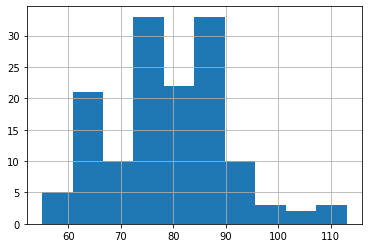

In [21]:
wnba["Weight"].hist()

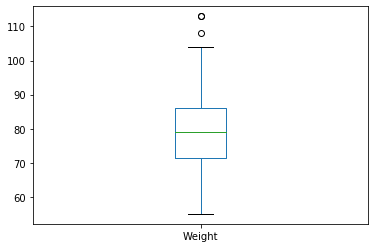

In [22]:
wnba["Weight"].plot(kind = "box")

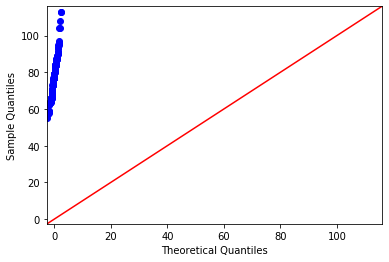

'\nThe QQ Plot allows us to see deviation of a normal distribution \nmuch better than in a Histogram or box plot.\n'

In [23]:
import statsmodels.api as sm
import pylab
my_data = wnba["Weight"]
sm.qqplot(my_data, line='45')
pylab.show()

"""
The QQ Plot allows us to see deviation of a normal distribution 
much better than in a Histogram or box plot.
"""

In [24]:
# KS Test
from scipy.stats import kstest, norm
my_data = wnba["Weight"]
ks_statistic, p_value = kstest(my_data, 'norm')
print(ks_statistic, p_value)

# Resource: https://towardsdatascience.com/6-ways-to-test-for-a-normal-distribution-which-one-to-use-9dcf47d8fa93

1.0 0.0


In [25]:
# Shapiro test

from scipy.stats import norm
from scipy import stats
my_data = wnba["Weight"]
stats.shapiro(my_data)

# Resource: https://towardsdatascience.com/6-ways-to-test-for-a-normal-distribution-which-one-to-use-9dcf47d8fa93

(0.9781054854393005, 0.022327149286866188)

**What are your comments in regards to the results of the test?**

In [26]:
"""
QQ Plot: There is no straight line so we do not a normal distribution.

KS Test: P<0.05 so we do not assume a normal distribution

Shapiro: P< 0.05, so we do not assume a normal distribution
"""

'\nQQ Plot: There is no straight line so we do not a normal distribution.\n\nKS Test: P<0.05 so we do not assume a normal distribution\n\nShapiro: P< 0.05, so we do not assume a normal distribution\n'

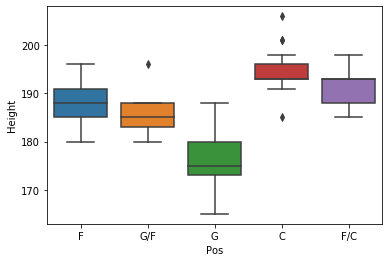

In [34]:
import seaborn as sns
sns.boxplot(x="Pos",y="Height", data=wnba)

In [ ]:
F = Small Forward
G/F = Shooting Guard
G = Point Guard
C = Center
F/C = Small Forward

In [ ]:
# Does shooting guard and point guard positions really get to score all the field goals?


In [ ]:
# Compare age against all % categories (field goals, 3points, free throws)


In [ ]:
# Compare time played against all  % categories (field goals, 3points, free throws)
# Compare time played against which college they are from
# Which position takes the most type of shot?
# Look at comparison between years of experience against time played

In [39]:
data = wnba[wnba["Team"] == "MIN"]
data

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
4,Alexis Jones,MIN,G,175,78,25.469388,US,"August 5, 1994",23,Baylor,R,24,137,16,50,32.0,7,20,35.0,11,12,91.7,3,9,12,12,7,0,14,50,0,0
67,Jia Perkins,MIN,G,173,75,25.059307,US,"February 23, 1982",35,Texas Tech,14,30,932,178,420,42.4,47,123,38.2,114,134,85.1,24,72,96,103,41,11,83,517,0,0
88,Lindsay Whalen,MIN,G,175,78,25.469388,US,"September 5, 1982",34,Minnesota,14,22,520,69,153,45.1,12,34,35.3,27,36,75.0,8,46,54,90,11,2,44,177,0,0
93,Maya Moore,MIN,F,183,80,23.888441,US,"November 6, 1989",27,Connecticut,7,29,904,170,398,42.7,52,132,39.4,98,114,86.0,50,106,156,99,53,13,56,490,3,0
99,Natasha Howard,MIN,F,188,75,21.220009,US,"February 9, 1991",26,Florida State,4,29,315,48,104,46.2,3,13,23.1,17,23,73.9,25,38,63,16,11,19,20,116,0,0
105,Plenette Pierson,MIN,F/C,188,88,24.898144,US,"August 31, 1981",35,Texas Tech,15,29,402,54,142,38.0,17,51,33.3,15,20,75.0,13,49,62,48,12,4,33,140,0,0
109,Rebekkah Brunson,MIN,F,188,84,23.766410,US,"November 12, 1981",35,Georgetown,14,26,719,97,218,44.5,22,60,36.7,62,83,74.7,46,135,181,40,31,9,42,278,2,0
110,Renee Montgomery,MIN,G,170,63,21.799308,US,"February 12, 1986",31,Connecticut,9,29,614,71,181,39.2,30,89,33.7,44,51,86.3,12,34,46,96,24,1,43,216,0,0
116,Seimone Augustus,MIN,G/F,183,77,22.992624,US,"April 30, 1984",33,LSU,12,27,756,125,251,49.8,18,41,43.9,30,35,85.7,12,70,82,108,17,1,39,298,1,0
130,Sylvia Fowles,MIN,C,198,96,24.487297,US,"June 10, 1985",32,LSU,10,29,895,222,336,66.1,0,0,0.0,128,162,79.0,113,184,297,39,39,61,71,572,16,0
